In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, make_scorer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder

In [2]:
df_bank_ = pd.read_csv('C:\\Users\\M.S.Chandrashekar\\Desktop\\Python\\Machine learning\\Bank portugese Dataset\\Bank_dep_marketing_encoded.csv')

In [3]:
df_bank_.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,...,marital_enc,education_enc,default_enc,housing_enc,loan_enc,contact_enc,job_enc,poutcome_enc,target,educ_ord
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,...,1,2,0,1,0,2,4,3,0,8
1,1,44,technician,single,secondary,no,29,yes,no,unknown,...,2,1,0,1,0,2,9,3,0,6
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,...,1,1,0,1,1,2,2,3,0,6
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,...,1,3,0,1,0,2,1,3,0,1
4,4,33,unknown,single,unknown,no,1,no,no,unknown,...,2,3,0,0,0,2,11,3,0,1


In [4]:
df_bank_.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y', 'marital_enc',
       'education_enc', 'default_enc', 'housing_enc', 'loan_enc',
       'contact_enc', 'job_enc', 'poutcome_enc', 'target', 'educ_ord'],
      dtype='object')

In [5]:
df_bank_ = df_bank_.drop('Unnamed: 0',axis = 1)
df_bank_.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,marital_enc,education_enc,default_enc,housing_enc,loan_enc,contact_enc,job_enc,poutcome_enc,target,educ_ord
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,2,0,1,0,2,4,3,0,8
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,2,1,0,1,0,2,9,3,0,6
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,1,0,1,1,2,2,3,0,6
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,3,0,1,0,2,1,3,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,2,3,0,0,0,2,11,3,0,1


In [6]:
mnmx_scl = MinMaxScaler()

age_list = np.array(df_bank_[['age']])

df_bank_['age_scl'] = mnmx_scl.fit_transform(age_list)

In [7]:
df_bank_['age_scl']

0        0.519481
1        0.337662
2        0.194805
3        0.376623
4        0.194805
           ...   
45206    0.428571
45207    0.688312
45208    0.701299
45209    0.506494
45210    0.246753
Name: age_scl, Length: 45211, dtype: float64

In [8]:
stdscl = StandardScaler()
bal_list = np.array(df_bank_['balance'])

bal_list_2d = np.reshape(bal_list,(-1 , 1))

df_bank_['bal_scl'] = stdscl.fit_transform(bal_list_2d)

In [9]:
df_bank_['bal_scl']

0        0.256419
1       -0.437895
2       -0.446762
3        0.047205
4       -0.447091
           ...   
45206   -0.176460
45207    0.120447
45208    1.429593
45209   -0.228024
45210    0.528364
Name: bal_scl, Length: 45211, dtype: float64

In [10]:
df_bank_['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [11]:
mnmx_scl = MinMaxScaler()
day_list = np.array(df_bank_['day'])

day_list_2d = np.reshape(day_list,(-1 , 1))

df_bank_['day_scl'] = mnmx_scl.fit_transform(bal_list_2d)

In [12]:
df_bank_['day_scl'].value_counts()

0.072803    3514
0.072812     195
0.072822     156
0.072840     139
0.072831     134
            ... 
0.264258       1
0.111361       1
0.065931       1
0.128974       1
0.000000       1
Name: day_scl, Length: 7168, dtype: int64

In [13]:
OE = OrdinalEncoder()

month_list = np.array(df_bank_[['month']])

OE.fit(month_list)

df_bank_['month_scl'] = OE.fit_transform(month_list)

In [14]:
df_bank_['month_scl']

0        8.0
1        8.0
2        8.0
3        8.0
4        8.0
        ... 
45206    9.0
45207    9.0
45208    9.0
45209    9.0
45210    9.0
Name: month_scl, Length: 45211, dtype: float64

In [15]:
df_bank_.campaign.value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63        1
Name: campaign, dtype: int64

In [16]:
mnmx_scl = MinMaxScaler()
cmp_list = np.array(df_bank_[['campaign']])

df_bank_['cmp_list'] = mnmx_scl.fit_transform(cmp_list)

In [17]:
print(df_bank_['cmp_list'].value_counts())

0.000000    17544
0.016129    12505
0.032258     5521
0.048387     3522
0.064516     1764
0.080645     1291
0.096774      735
0.112903      540
0.129032      327
0.145161      266
0.161290      201
0.177419      155
0.193548      133
0.209677       93
0.225806       84
0.241935       79
0.258065       69
0.274194       51
0.290323       44
0.306452       43
0.322581       35
0.338710       23
0.387097       22
0.354839       22
0.370968       20
0.435484       16
0.451613       16
0.403226       13
0.483871       12
0.419355       10
0.500000        9
0.467742        8
0.516129        6
0.532258        5
0.564516        4
0.548387        4
0.677419        3
0.596774        3
0.580645        2
0.645161        2
0.790323        2
0.725806        1
0.612903        1
0.919355        1
0.693548        1
1.000000        1
0.870968        1
0.806452        1
Name: cmp_list, dtype: int64


In [18]:
df_bank_['previous'] = df_bank_['previous'].replace(275, 58)

In [19]:
mnmx_scl = MinMaxScaler()
prvs_list = np.array(df_bank_[['previous']])

df_bank_['prvs_scl'] = mnmx_scl.fit_transform(prvs_list)

In [20]:
df_bank_['prvs_scl'].value_counts()

0.000000    36954
0.017241     2772
0.034483     2106
0.051724     1142
0.068966      714
0.086207      459
0.103448      277
0.120690      205
0.137931      129
0.155172       92
0.172414       67
0.189655       65
0.206897       44
0.224138       38
0.258621       20
0.241379       19
0.293103       15
0.275862       13
0.327586       11
0.396552        8
0.344828        8
0.379310        6
0.310345        6
0.413793        5
0.465517        5
0.500000        4
0.362069        4
0.431034        4
0.517241        3
0.637931        2
0.482759        2
0.448276        2
0.655172        2
1.000000        2
0.603448        1
0.551724        1
0.948276        1
0.879310        1
0.689655        1
0.706897        1
Name: prvs_scl, dtype: int64

In [21]:
df_bank_.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'marital_enc', 'education_enc',
       'default_enc', 'housing_enc', 'loan_enc', 'contact_enc', 'job_enc',
       'poutcome_enc', 'target', 'educ_ord', 'age_scl', 'bal_scl', 'day_scl',
       'month_scl', 'cmp_list', 'prvs_scl'],
      dtype='object')

In [22]:
df_bank_.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [23]:
pout_list = np.array(df_bank_[['poutcome']])

OE.fit(pout_list)

df_bank_['poutcome'] = OE.fit_transform(pout_list)

In [24]:
df_bank_['poutcome'].value_counts()

3.0    36959
0.0     4901
1.0     1840
2.0     1511
Name: poutcome, dtype: int64

In [25]:
mnmx_scl = MinMaxScaler()
dur_list = np.array(df_bank_[['duration']])

df_bank_['dur_scl'] = mnmx_scl.fit_transform(dur_list)

In [26]:
df_bank_.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'marital_enc', 'education_enc',
       'default_enc', 'housing_enc', 'loan_enc', 'contact_enc', 'job_enc',
       'poutcome_enc', 'target', 'educ_ord', 'age_scl', 'bal_scl', 'day_scl',
       'month_scl', 'cmp_list', 'prvs_scl', 'dur_scl'],
      dtype='object')

In [27]:
model_feat = ['poutcome', 'marital_enc',
       'default_enc', 'housing_enc', 'loan_enc', 'contact_enc', 'job_enc',
       'poutcome_enc', 'educ_ord', 'age_scl', 'bal_scl', 'day_scl',
       'month_scl', 'cmp_list', 'prvs_scl','dur_scl','target']

In [28]:
df_bank_mod = df_bank_[model_feat]
df_bank_mod

,poutcome,marital_enc,default_enc,housing_enc,loan_enc,contact_enc,job_enc,poutcome_enc,educ_ord,age_scl,bal_scl,day_scl,month_scl,cmp_list,prvs_scl,dur_scl,target
0,3.0,1,0,1,0,2,4,3,8,0.519481,0.256419,0.092259,8.0,0.000000,0.000000,0.053070,0
1,3.0,2,0,1,0,2,9,3,6,0.337662,-0.437895,0.073067,8.0,0.000000,0.000000,0.030704,0
2,3.0,1,0,1,1,2,2,3,6,0.194805,-0.446762,0.072822,8.0,0.000000,0.000000,0.015453,0
3,3.0,1,0,1,0,2,1,3,1,0.376623,0.047205,0.086476,8.0,0.000000,0.000000,0.018707,0
4,3.0,2,0,0,0,2,11,3,1,0.194805,-0.447091,0.072812,8.0,0.000000,0.000000,0.040260,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,3.0,1,0,0,0,0,9,3,8,0.428571,-0.176460,0.080293,9.0,0.032258,0.000000,0.198658,1
45207,3.0,0,0,0,0,0,5,3,3,0.688312,0.120447,0.088501,9.0,0.016129,0.000000,0.092721,1
45208,2.0,1,0,0,0,0,5,2,6,0.701299,1.429593,0.124689,9.0,0.064516,0.051724,0.229158,1
45209,3.0,1,0,0,0,1,1,3,6,0.506494,-0.228024,0.078868,9.0,0.048387,0.000000,0.103294,0


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

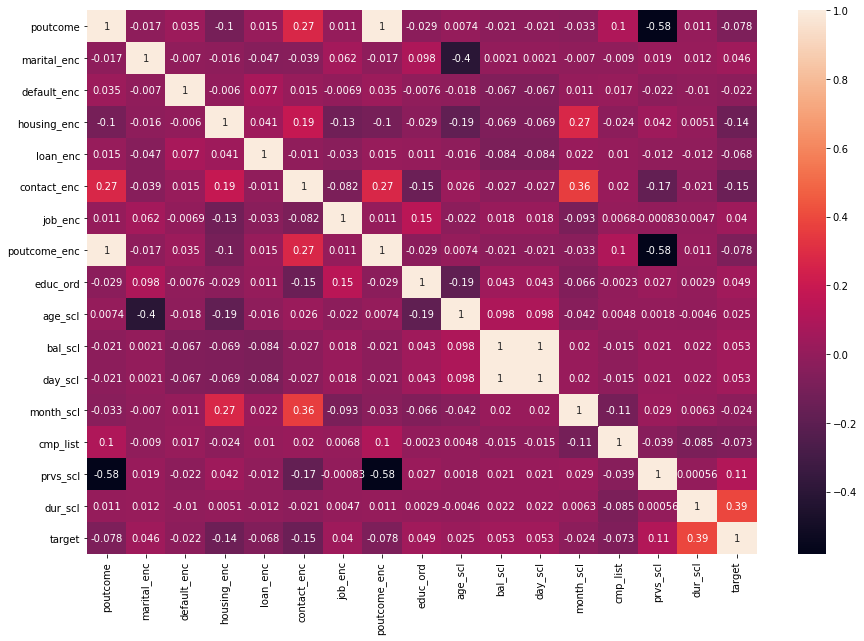

In [30]:
plt.figure(figsize = (15,10))
sns.heatmap(df_bank_mod.corr(), annot = True)

Out of all the features correlated with 'target' variable
- Feature 'dur_scl' has high correlation (0.39) with target - so we remove this feature to have less biased model to avoid overfit as thsi feature is specific to each customer - Duration of call and outcome.

In [31]:
df_bank_mod = df_bank_mod.drop('dur_scl', axis = 1)


In [32]:
df_bank_mod.head()

,poutcome,marital_enc,default_enc,housing_enc,loan_enc,contact_enc,job_enc,poutcome_enc,educ_ord,age_scl,bal_scl,day_scl,month_scl,cmp_list,prvs_scl,target
0,3.0,1,0,1,0,2,4,3,8,0.519481,0.256419,0.092259,8.0,0.0,0.0,0
1,3.0,2,0,1,0,2,9,3,6,0.337662,-0.437895,0.073067,8.0,0.0,0.0,0
2,3.0,1,0,1,1,2,2,3,6,0.194805,-0.446762,0.072822,8.0,0.0,0.0,0
3,3.0,1,0,1,0,2,1,3,1,0.376623,0.047205,0.086476,8.0,0.0,0.0,0
4,3.0,2,0,0,0,2,11,3,1,0.194805,-0.447091,0.072812,8.0,0.0,0.0,0


In [33]:
X = df_bank_mod.iloc[ :, :-1]
y = df_bank_mod.iloc[:, -1]

In [34]:
X_train, X_test, y_train, y_test = train_test_split( X , y , test_size = 0.4, stratify = y )
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(27126, 15) (27126,)
(18085, 15) (18085,)


In [35]:
rf_clf = RandomForestClassifier()

scoring = make_scorer(roc_auc_score, accuracy_score)

params = {'n_estimators': [100, 150, 200] }

rf_clf_cv = GridSearchCV (rf_clf, params, cv =5, scoring = scoring)

rf_clf_cv.fit(X_train, y_train)

rf_clf_cv.best_params_

C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass greater_is_better=<function accuracy_score at 0x000001DFC85EDA60> as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


{'n_estimators': 150}

In [36]:
rf_clf_150 = RandomForestClassifier(n_estimators = 150)

rf_clf_150.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [37]:
y_rf_pred_150 = rf_clf_150.predict(X_test)


In [38]:
y_rf_150_acc = accuracy_score(y_test, y_rf_pred_150)
y_rf_150_acc

0.8891346419684821

In [39]:
y_rf_150_auc = roc_auc_score(y_test, y_rf_pred_150)
y_rf_150_auc

0.5848542237020902

In [40]:
y_rf_150_clf = classification_report(y_test, y_rf_pred_150)
print(y_rf_150_clf)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     15969
           1       0.58      0.19      0.28      2116

    accuracy                           0.89     18085
   macro avg       0.74      0.58      0.61     18085
weighted avg       0.86      0.89      0.86     18085



In [41]:
score = cross_val_score(rf_clf_150, X = X_train, y = y_train, scoring=scoring, cv = 6 )
score

array([0.59956486, 0.58612617, 0.60882209, 0.57711856, 0.59218461,
       0.60119222])

In [42]:
xg_clf = XGBClassifier(use_label_encoder=False, verbose = 1)

scoring = make_scorer(roc_auc_score, accuracy_score)

params = {'n_estimators': [100, 150, 200], 'learning_rate': [0.05, 0.1]}

xg_clf_cv = GridSearchCV ( xg_clf, params, cv =5, scoring = scoring)

xg_clf_cv.fit(X_train, y_train)

xg_clf_cv.best_params_

C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass greater_is_better=<function accuracy_score at 0x000001DFC85EDA60> as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[09:14:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:14:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:14:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:14:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:14:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:14:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:14:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:14:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:14:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:14:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:14:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:14:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:14:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:14:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:14:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:14:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:14:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:14:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:14:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:14:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:14:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:14:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:14:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:15:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:15:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:15:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:15:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:15:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:15:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:15:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:15:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:15:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:15:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:15:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:15:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:15:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:15:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:15:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:15:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:15:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:15:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:15:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:15:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:15:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:15:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:15:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:15:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:15:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:15:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:15:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:15:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:16:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:16:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:16:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:16:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:16:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:16:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[09:16:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:16:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'learning_rate': 0.1, 'n_estimators': 200}

In [43]:
xg_clf_200 = XGBClassifier(n_estimators = 200, learning_rate = 0.1)

xg_clf_200.fit(X_train, y_train)

C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:16:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
y_xg_pred_200 = xg_clf_200.predict(X_test)

C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [45]:
y_xg_200_acc = accuracy_score(y_test, y_xg_pred_200)
y_xg_200_acc

0.8890793475255737

In [46]:
y_xg_200_auc = roc_auc_score(y_test, y_xg_pred_200)
y_xg_200_auc

0.5897425345965085

In [47]:
y_xg_200_clf = classification_report(y_test, y_xg_pred_200)
print(y_xg_200_clf)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     15969
           1       0.58      0.20      0.30      2116

    accuracy                           0.89     18085
   macro avg       0.74      0.59      0.62     18085
weighted avg       0.86      0.89      0.86     18085



In [48]:
score_xg = cross_val_score(xg_clf_200, X = X_train, y = y_train, scoring=scoring, cv = 6 )
score_xg

[09:16:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifi

[09:16:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:16:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:16:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:16:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:16:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


array([0.59831267, 0.59261718, 0.61997056, 0.58266438, 0.60346994,
       0.61354798])

In [49]:
#from sklearn.svm import SVC

In [50]:
#svm_clf = SVC()

#svm_clf.fit(X_train, y_train)

In [51]:
#y_pred_svm = svm_clf.predict(X_test)
#y_pred_svm_tr = svm_clf.predict(X_train)

In [52]:
#y_svm_acc = accuracy_score(y_test, y_pred_svm)
#y_svm__acc

In [53]:
#y_svm_acc_tr = accuracy_score(y_train, y_pred_svm_tr)
#y_svm_acc_tr

In [54]:
#y_svm_auc = roc_auc_score(y_test, y_pred_svm)
#y_svm_auc

In [55]:
#y_svm_auc_tr = roc_auc_score(y_train, y_pred_svm_tr)
#y_svm_auc_tr

In [56]:
#y_svm_clf = classification_report(y_test, y_pred_svm)
#print(y_svm_clf)

In [57]:
#y_svm_clf_tr = classification_report(y_train, y_pred_svm_tr)
#print(y_svm_clf_tr)

In [58]:
#svm_clf.dual_coef_

In [59]:
#score_svm = cross_val_score(svm_clf, X = X_train, y = y_train, scoring=scoring, cv = 6 )
#score_svm

- **Model performance inferences are as follows:**
    - Tree based classifiers Random Forest classifier and XGBoost classifier exhibit similar performances as per accucary scores(89.09% & 89.12%) and TPR(recall rate) is (59% & 60%) for consistently as we see in each of the fold CV scores.
    - Support Vector Classifier suits the data in lesser manner as confirmed by the performance measures. Though the accuracy rate in 88%, the TPR recall rate for class 1 scores 0% - it underfits the data.
    - Further the model performance of Tree based classifiers to be improved with Recusrsive Feature elemination for better TPR rate (espaecially for class 1 label).

### McNemar's Test for RF and XG Classifier

In [60]:
class1_RF_cnc_list = []

class1_y_train_cnt = len(y_test[y_test==1])

class1_y_rf_pred_cnt = len(y_rf_pred_150[y_rf_pred_150==1])

class1_y_xg_pred_cnt = len(y_xg_pred_200[y_xg_pred_200==1])

- Creating Dataframe of class1 prediction of RF and XGB Classifier

In [61]:
list_class1_tr =list(y_test[y_test==1].index)
ser_class1_tr = pd.Series(list_class1_tr)
class1_ser_tr_dict = ser_class1_tr.to_dict()   
len(class1_ser_tr_dict)

2116

In [62]:
y_rf_pred_cnc_ind = np.linspace(0,0,3173)
index_list = np.linspace(0,0,3173)
y_xg_pred_cnc_ind = np.linspace(0,0,3173)

for i, val in enumerate(class1_ser_tr_dict):
    index_list[i] = val
    y_rf_pred_cnc_ind[i] = y_rf_pred_150[val]
    y_xg_pred_cnc_ind[i] = y_xg_pred_200[val]

y_rf_pred_ser = pd.Series(y_rf_pred_cnc_ind)
y_xg_pred_ser = pd.Series(y_xg_pred_cnc_ind)

y_rf_pred_df = y_rf_pred_ser.to_frame(name = "Y-Rf - pred")
y_xg_pred_df = y_xg_pred_ser.to_frame(name = "Y-xg - pred")

In [64]:
y_test_ser = pd.Series(np.linspace(1,1,3173))
y_test_df = y_test_ser.to_frame(name = "Y-test val")
y_test_df

,Y-test val
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
3168,1.0
3169,1.0
3170,1.0
3171,1.0


In [65]:
y_test_df = y_test_df.join(y_rf_pred_df)

In [66]:
y_test_df = y_test_df.join(y_xg_pred_df)

In [67]:
y_test_df.head()

,Y-test val,Y-Rf - pred,Y-xg - pred
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [68]:
y_test_df['Y-Rf - pred'].value_counts()

0.0    3085
1.0      88
Name: Y-Rf - pred, dtype: int64

In [69]:
y_test_df['Y-xg - pred'].value_counts()

0.0    3088
1.0      85
Name: Y-xg - pred, dtype: int64

In [70]:
cnf_mat = np.array([[0,0],[0,0]])
cnf_mat.shape

(2, 2)

In [71]:
from sklearn.metrics import confusion_matrix

1. McNemar's test given RF classifier predictions in Y-True comparing to XGB classifier

In [75]:
cnf_mat = confusion_matrix(y_test_df['Y-Rf - pred'],y_test_df['Y-xg - pred'])
cnf_mat

array([[3066,   19],
       [  22,   66]], dtype=int64)

In [73]:
from statsmodels.stats.contingency_tables import mcnemar

In [76]:
print(mcnemar(cnf_mat, exact=False, correction=True))

pvalue      0.7547764265871045
statistic   0.0975609756097561


2. McNemar's test given XGB classifier predictions in Y-True comparing to RF classifier

In [77]:
cnf_mat2 = confusion_matrix(y_test_df['Y-xg - pred'],y_test_df['Y-Rf - pred'])
cnf_mat2

array([[3066,   22],
       [  19,   66]], dtype=int64)

In [78]:
print(mcnemar(cnf_mat2, exact=False, correction=True))

pvalue      0.7547764265871045
statistic   0.0975609756097561


### Model performance comparison based on Class1 prediction - McNemar's Test

- we have calculated confusion matrix of RFClassifier class1 prediction and XGBClassifier class1 prediction
- Null Hyothesis: Model performances in predicting class1 is similar
- Alternate Hypothesis: Model performances in predicting class1 is significantly different 
- The McNemars test results in p-value of 0.45, which is signifacntly higher than considered alpha = 0.05 
- so we cannot reject the Null Hypothesis of similarity in Model performances

### Applying PCA , LDA (Dim Reduction) to imporve model performance

In [79]:
from sklearn.decomposition import PCA

In [82]:
pca = PCA(n_components=0.95, random_state =1456)

In [83]:
pca.fit(X)
X_new = pca.transform(X)

In [84]:
print(pca.explained_variance_ratio_)

[0.40524093 0.3131836  0.12423088 0.07316309 0.03590481]


In [101]:
X_new.shape

(45211, 5)

#### Applying SVM to check for model class 1 prediction improvement

In [85]:
from sklearn.svm import SVC

In [86]:
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_new, y, test_size = 0.4, stratify=y)

In [105]:
X_n_test.shape

(18085, 5)

In [87]:
svc = SVC()

svc.fit(X_n_train, y_n_train)

SVC()

In [88]:
y_pred_svc = svc.predict(X_n_test)

In [89]:
y_svc_acc = accuracy_score(y_test, y_pred_svc)
y_svc_acc

0.88299695880564

In [91]:
y_svc_clf = classification_report(y_test, y_pred_svc)
print(y_svc_clf)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     15969
           1       0.00      0.00      0.00      2116

    accuracy                           0.88     18085
   macro avg       0.44      0.50      0.47     18085
weighted avg       0.78      0.88      0.83     18085



C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
rf_clf_n = RandomForestClassifier()

scoring = make_scorer(roc_auc_score, accuracy_score)

params = {'n_estimators': [100, 150, 200] }

rf_clf_n_cv = GridSearchCV (rf_clf_n, params, cv =5, scoring = scoring)

rf_clf_n_cv.fit(X_n_train, y_n_train)


C:\Users\M.S.Chandrashekar\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass greater_is_better=<function accuracy_score at 0x000001DFC85EDA60> as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 150, 200]},
             scoring=make_scorer(roc_auc_score))

In [93]:
rf_clf_n_cv.best_params_

{'n_estimators': 200}

In [94]:
rf_clf_200 = RandomForestClassifier(n_estimators = 200)

rf_clf_200.fit(X_n_train, y_n_train)

RandomForestClassifier(n_estimators=200)

In [96]:
y_pred_rf_n = rf_clf_200.predict(X_n_test)
y_pred_rf_n

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [97]:
y_rf_200_acc = accuracy_score(y_test, y_pred_rf_n)
y_rf_200_acc

0.8389272878075753

In [98]:
y_rf_200_clf = classification_report(y_test, y_pred_rf_n)
print(y_rf_200_clf)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     15969
           1       0.10      0.05      0.06      2116

    accuracy                           0.84     18085
   macro avg       0.49      0.50      0.49     18085
weighted avg       0.79      0.84      0.81     18085



PCA leads to reduced performance of RandomForest model as seen from the macro avg recall rate of 50% (before PCA 56%)
And no improvement in SVM model perrformance

#### Applying Log Reg model with hyperparameter GridSearch for class_weights to compensate for Class 1 ratio imbalance

In [107]:
from sklearn.linear_model import LogisticRegression

In [191]:
LogReginst = LogisticRegression(random_state = 1567)

w = [{0:0.1, 1:100}, {0:10, 1:100}, {0:5, 1:10}, {0:5, 1:30}, {0:5, 1:40},{0:5, 1:45}  ]

c = [0.01, 0.1, 1, 10, 100, 1000]

params = {'class_weight': w, 'C' : c}

scoring = make_scorer(roc_auc_score)
     
LogRegcv = GridSearchCV(LogReginst, params, cv = 5, scoring = scoring)
     
LogRegcv.fit(X_n_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=1567),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': [{0: 0.1, 1: 100}, {0: 10, 1: 100},
                                          {0: 5, 1: 10}, {0: 5, 1: 30},
                                          {0: 5, 1: 40}, {0: 5, 1: 45}]},
             scoring=make_scorer(roc_auc_score))

In [192]:
LogRegcv.best_params_

{'C': 0.1, 'class_weight': {0: 5, 1: 40}}

In [197]:
LogReg_cw = LogisticRegression(C = 0.01, class_weight = {0: 5, 1: 40}, random_state = 23345)

In [198]:
LogReg_cw.fit(X_n_train, y_n_train)

LogisticRegression(C=0.01, class_weight={0: 5, 1: 40}, random_state=23345)

In [199]:
y_pred_logreg = LogReg_cw.predict(X_n_test)
y_pred_logreg

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [200]:
y_logreg_acc = accuracy_score(y_n_test, y_pred_logreg )
y_logreg_acc

0.6086812275366326

In [201]:
y_logreg_roc = roc_auc_score(y_n_test, y_pred_logreg)
y_logreg_roc

0.6013080518362551

In [215]:
y_log_reg_clf = classification_report(y_n_test, y_pred_logreg)
print(y_log_reg_clf)

              precision    recall  f1-score   support

           0       0.92      0.61      0.73     15969
           1       0.17      0.59      0.26      2116

    accuracy                           0.61     18085
   macro avg       0.54      0.60      0.50     18085
weighted avg       0.83      0.61      0.68     18085



#### Applying LDA to check performance improvement of LogReg classifier 

In [131]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [135]:
X.columns

Index(['poutcome', 'marital_enc', 'default_enc', 'housing_enc', 'loan_enc',
       'contact_enc', 'job_enc', 'poutcome_enc', 'educ_ord', 'age_scl',
       'bal_scl', 'day_scl', 'month_scl', 'cmp_list', 'prvs_scl'],
      dtype='object')

In [141]:
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X, y)

LinearDiscriminantAnalysis(n_components=1)

In [143]:
X_lda = lda.transform(X)
X_lda.shape

(45211, 1)

In [146]:
X_l_train, X_l_test, y_l_train, y_l_test = train_test_split(X_lda, y, test_size = 0.4, stratify = y)
X_l_train.shape

(27126, 1)

In [148]:
LogReginst2 = LogisticRegression(random_state = 1567)

w2 = [{0:1, 1:100}, {0:1, 1:1000} , {0:0.1, 1:10}, {0:0.1, 1:100}, {0:10, 1:100} ]

c2 = [0.01, 0.1, 1, 10, 100, 1000]

params = {'class_weight': w2, 'C' : c2}
     
LogRegcv2 = GridSearchCV(LogReginst, params, cv = 5)
     
LogRegcv2.fit(X_l_train, y_l_train)

LogRegcv2.best_params_

{'C': 1, 'class_weight': {0: 10, 1: 100}}

In [149]:
LogReg2 = LogisticRegression(C = 1, class_weight = {0: 10, 1: 100},random_state = 1767)

LogReg2.fit(X_l_train, y_l_train)

LogisticRegression(C=1, class_weight={0: 10, 1: 100}, random_state=1767)

In [150]:
y_pred_log_l = LogReg2.predict(X_l_test)
y_pred_log_l

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [203]:
y_pred_log_roc = roc_auc_score(y_l_test, y_pred_log_l)
y_pred_log_roc

0.6462576623824917

In [204]:
y_pred_log_acc = accuracy_score(y_l_test, y_pred_log_l)
y_pred_log_acc

0.5247995576444567

In [205]:
y_log_reg_clf = classification_report(y_l_test, y_pred_log_l)
print(y_log_reg_clf)

              precision    recall  f1-score   support

           0       0.95      0.49      0.64     15969
           1       0.17      0.80      0.28      2116

    accuracy                           0.52     18085
   macro avg       0.56      0.65      0.46     18085
weighted avg       0.86      0.52      0.60     18085



Random Forest Classifier with PCA

In [206]:
RF_inst2 = RandomForestClassifier()

params = {'n_estimators': [100, 150, 200]}

scoring = make_scorer(roc_auc_score)
     
RF_Cl_cv2 = GridSearchCV(RF_inst2, params, cv = 5, scoring = scoring)
     
RF_Cl_cv2.fit(X_l_train, y_l_train)

RF_Cl_cv2.best_params_

{'n_estimators': 150}

In [207]:
RF_lda_150 = RandomForestClassifier(n_estimators = 150)

RF_lda_150.fit(X_l_train, y_l_train)

y_pred_RF_lda = RF_lda_150.predict(X_l_test)

In [211]:
y_lf_lda_roc = roc_auc_score(y_l_test, y_pred_RF_lda)
y_lf_lda_roc

0.5381754240049927

In [212]:
y_lf_lda_acc = accuracy_score(y_l_test, y_pred_RF_lda)
y_lf_lda_acc

0.8092341719657175

In [214]:
y_lf_lda_clf = classification_report(y_l_test,y_pred_RF_lda)
print(y_lf_lda_clf)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     15969
           1       0.18      0.18      0.18      2116

    accuracy                           0.81     18085
   macro avg       0.54      0.54      0.54     18085
weighted avg       0.81      0.81      0.81     18085



### Model performance improvement summary

- Without Dim Reduction techniques on the feature set, below is the performance metrics:
 - Tree based classifiers Random Forest classifier and XGBoost classifier exhibit similar performances as per accucary scores(89.09% & 89.12%) and TPR(recall rate) is (59% & 60%) for consistently as we see in each of the fold CV scores.
 
 - With Dim Reduction Technique PCA applied - 5 significant features, below is the performance metrics:
     - SVC no improvement, RF classifier reduced performance with avg Recall rate of 50% (from 56%)
 
 - Due to class label ratio imbalance, class_weight parameter was optimized in Log Reg model to achieve higher ROC-AUC score:
     - Log Reg model metrics: 61% avg. recall rate & 60% accuracy (Accuracy trade-off for improving recall rate)
 
 - With LDA applied - gives 1 feature reduced dataset, below are performance metrics:
     - Log Reg model metrics: 65% avg. recall rate & 52% accuracy (Accuracy reduced with increase in recall rate)
     - RF Classifier metrics  54% avg recall rate & 81% accuracy.
 
 - *After all the improvement metrics considered **RF classifier model** can be applied for this Dataset for predicting Bank Deposit conversion of customer - RF model has shown consistency before and after applying Dim reduction techniques.*
 